In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras

# For data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
def get_cdf(x):
    """
    Computes cumulative distribution function for the input vector.
    Input—
        x: data vector
    Output—
        cdf: cumulative distribution function
    """
    x_sorted = np.unique(x) # handles ties
    n = x_sorted.size
    x_sorted_cdf = np.array(list(range(n)))/(n-1)
    cdf = np.stack((x_sorted, x_sorted_cdf))
    
    return cdf

In [3]:
def map_point_to_linear_interp(x_val, memb):
    X = memb[0,:]
    Y = memb[1,:]
    i = np.sum(X < x_val) # index of first X value > x_val
    n = Y.size
    
    if(i == 0): # lower bound
        return Y[0]
    elif(i == n): # upper bound
        return Y[n - 1] 
    else: # y = b + m*x
        return (Y[i-1] + ((Y[i] - Y[i-1])/(X[i] - X[i-1]))*(x_val - X[i-1]))

def map_data_to_linear_interp(x, memb):
    """
    Map each value of vector x according to the linear function
    interpolated between the points specified by the membership function.
    Input—
        x: input vector of values
    Output—
        memb: distribution specified by two rows. Row 1 contains
            the raw x values. Row 2 contains the membership of the
            raw x values.
    """
    return np.array([map_point_to_linear_interp(x_val, memb) for x_val in x])

In [4]:
def rank_transform_fit(data):
    cdfs = list()
    for i in range(data.shape[1]):
        cdfs.append(get_cdf(data[:,i]))
    return cdfs

In [5]:
def rank_transform(data, cdfs):
    norm_data = np.zeros((data.shape[0], data.shape[1]), dtype=float)
    for i in range(data.shape[1]):
        norm_data[:,i] = map_data_to_linear_interp(data[:,i], cdfs[i])
    return norm_data

In [6]:
iris_data = load_iris()

X = iris_data.data
y = (iris_data.target==0).astype(int) # is setosa?

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
feature_names = iris_data.feature_names

In [7]:
cdfs = rank_transform_fit(X_train)
norm_X_train = rank_transform(X_train, cdfs)
norm_X_test = rank_transform(X_test, cdfs)

In [8]:
# Define a root log directory
import os
import time

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [9]:
run_logdir = get_run_logdir()
print(run_logdir)

./my_logs/run_2020_03_09-12_26_59


In [10]:
model = keras.models.Sequential([
    keras.layers.Input(shape=[X_train.shape[1]]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
    
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [11]:
history = model.fit(norm_X_train, y_train,
             batch_size=32, epochs=200, verbose=1,
             validation_data=(norm_X_test, y_test),
             callbacks=[keras.callbacks.EarlyStopping(patience=10),
                       keras.callbacks.TensorBoard(run_logdir)])

Train on 112 samples, validate on 38 samples
Epoch 1/200
112/112 [==============================] - 0s 3ms/sample - loss: 0.6320 - accuracy: 0.6696 - val_loss: 0.5537 - val_accuracy: 0.6579
Epoch 2/200
112/112 [==============================] - 0s 114us/sample - loss: 0.5070 - accuracy: 0.6696 - val_loss: 0.4425 - val_accuracy: 0.6579
Epoch 3/200
112/112 [==============================] - 0s 145us/sample - loss: 0.3996 - accuracy: 0.6964 - val_loss: 0.3258 - val_accuracy: 0.9211
Epoch 4/200
112/112 [==============================] - 0s 145us/sample - loss: 0.2836 - accuracy: 0.9464 - val_loss: 0.2065 - val_accuracy: 1.0000
Epoch 5/200
112/112 [==============================] - 0s 160us/sample - loss: 0.1776 - accuracy: 0.9911 - val_loss: 0.1149 - val_accuracy: 1.0000
Epoch 6/200
112/112 [==============================] - 0s 148us/sample - loss: 0.0998 - accuracy: 1.0000 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 7/200
112/112 [==============================] - 0s 151us/sample - lo

112/112 [==============================] - 0s 136us/sample - loss: 3.3374e-04 - accuracy: 1.0000 - val_loss: 1.4233e-04 - val_accuracy: 1.0000
Epoch 55/200
112/112 [==============================] - 0s 137us/sample - loss: 3.2050e-04 - accuracy: 1.0000 - val_loss: 1.3602e-04 - val_accuracy: 1.0000
Epoch 56/200
112/112 [==============================] - 0s 135us/sample - loss: 3.1081e-04 - accuracy: 1.0000 - val_loss: 1.3052e-04 - val_accuracy: 1.0000
Epoch 57/200
112/112 [==============================] - 0s 131us/sample - loss: 3.0387e-04 - accuracy: 1.0000 - val_loss: 1.2386e-04 - val_accuracy: 1.0000
Epoch 58/200
112/112 [==============================] - 0s 136us/sample - loss: 2.9703e-04 - accuracy: 1.0000 - val_loss: 1.2449e-04 - val_accuracy: 1.0000
Epoch 59/200
112/112 [==============================] - 0s 134us/sample - loss: 2.8836e-04 - accuracy: 1.0000 - val_loss: 1.2319e-04 - val_accuracy: 1.0000
Epoch 60/200
112/112 [==============================] - 0s 132us/sample - los

112/112 [==============================] - 0s 135us/sample - loss: 1.1140e-04 - accuracy: 1.0000 - val_loss: 4.0479e-05 - val_accuracy: 1.0000
Epoch 107/200
112/112 [==============================] - 0s 134us/sample - loss: 1.0870e-04 - accuracy: 1.0000 - val_loss: 4.0511e-05 - val_accuracy: 1.0000
Epoch 108/200
112/112 [==============================] - 0s 135us/sample - loss: 1.0787e-04 - accuracy: 1.0000 - val_loss: 4.1839e-05 - val_accuracy: 1.0000
Epoch 109/200
112/112 [==============================] - 0s 131us/sample - loss: 1.0562e-04 - accuracy: 1.0000 - val_loss: 4.2122e-05 - val_accuracy: 1.0000
Epoch 110/200
112/112 [==============================] - 0s 129us/sample - loss: 1.0452e-04 - accuracy: 1.0000 - val_loss: 4.2078e-05 - val_accuracy: 1.0000
Epoch 111/200
112/112 [==============================] - 0s 132us/sample - loss: 1.0289e-04 - accuracy: 1.0000 - val_loss: 3.9274e-05 - val_accuracy: 1.0000
Epoch 112/200
112/112 [==============================] - 0s 133us/sample

112/112 [==============================] - 0s 141us/sample - loss: 5.4022e-05 - accuracy: 1.0000 - val_loss: 1.7964e-05 - val_accuracy: 1.0000
Epoch 159/200
112/112 [==============================] - 0s 138us/sample - loss: 5.3327e-05 - accuracy: 1.0000 - val_loss: 1.7725e-05 - val_accuracy: 1.0000
Epoch 160/200
112/112 [==============================] - 0s 144us/sample - loss: 5.2912e-05 - accuracy: 1.0000 - val_loss: 1.7596e-05 - val_accuracy: 1.0000
Epoch 161/200
112/112 [==============================] - 0s 138us/sample - loss: 5.2251e-05 - accuracy: 1.0000 - val_loss: 1.7404e-05 - val_accuracy: 1.0000
Epoch 162/200
112/112 [==============================] - 0s 136us/sample - loss: 5.1643e-05 - accuracy: 1.0000 - val_loss: 1.7148e-05 - val_accuracy: 1.0000
Epoch 163/200
112/112 [==============================] - 0s 131us/sample - loss: 5.1108e-05 - accuracy: 1.0000 - val_loss: 1.7095e-05 - val_accuracy: 1.0000
Epoch 164/200
112/112 [==============================] - 0s 134us/sample

In [12]:
model.evaluate(norm_X_test, y_test)

38/38 [==============================] - 0s 82us/sample - loss: 1.0927e-05 - accuracy: 1.0000


[1.0926781573959344e-05, 1.0]

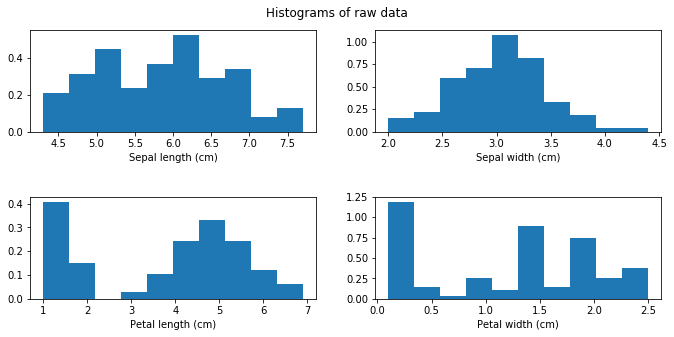

In [13]:
num_bins = 10

fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Histograms of raw data')
n, bins, patches = ax0.hist(X_train[:,0], num_bins, density=1)
ax0.set_xlabel('Sepal length (cm)')
n, bins, patches = ax1.hist(X_train[:,1], num_bins, density=1)
ax1.set_xlabel('Sepal width (cm)')
n, bins, patches = ax2.hist(X_train[:,2], num_bins, density=1)
ax2.set_xlabel('Petal length (cm)')
n, bins, patches = ax3.hist(X_train[:,3], num_bins, density=1)
ax3.set_xlabel('Petal width (cm)')
fig.tight_layout(pad=3.0)
plt.show()

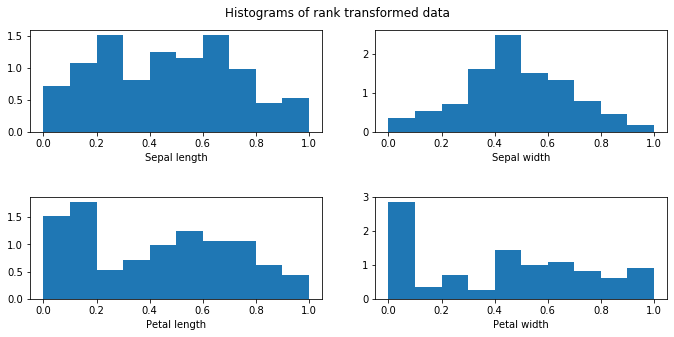

In [14]:
num_bins = 10

fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Histograms of rank transformed data')
n, bins, patches = ax0.hist(norm_X_train[:,0], num_bins, density=1)
ax0.set_xlabel('Sepal length')
n, bins, patches = ax1.hist(norm_X_train[:,1], num_bins, density=1)
ax1.set_xlabel('Sepal width')
n, bins, patches = ax2.hist(norm_X_train[:,2], num_bins, density=1)
ax2.set_xlabel('Petal length')
n, bins, patches = ax3.hist(norm_X_train[:,3], num_bins, density=1)
ax3.set_xlabel('Petal width')
fig.tight_layout(pad=3.0)
plt.show()

In [15]:
np.sort(X_train[:,3]) # significant source of ties
# original distribution is largely preserved

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.6, 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3,
       1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.7, 1.8, 1.8, 1.8,
       1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.9, 1.9, 1.9, 1.9, 2. ,
       2. , 2. , 2. , 2. , 2.1, 2.1, 2.1, 2.1, 2.2, 2.2, 2.2, 2.3, 2.3,
       2.3, 2.3, 2.3, 2.4, 2.4, 2.5, 2.5, 2.5])

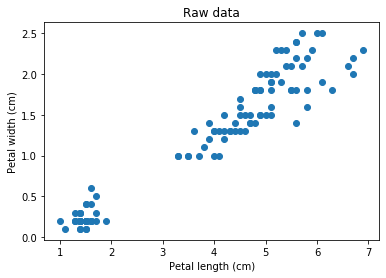

In [16]:
plt.scatter(X_train[:,2], X_train[:,3])
plt.title('Raw data')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()

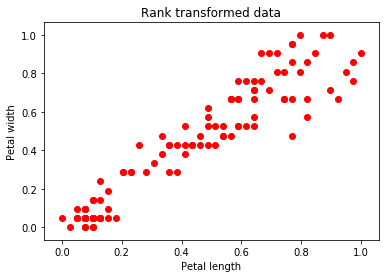

In [31]:
plt.scatter(norm_X_train[:,2], norm_X_train[:,3], color='r')
plt.title('Rank transformed data')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [18]:
def abs_jacobian_1output(x, model):
    """
    Computes the Jacobian of an input vector and 
    a Keras model with a single output node.
    
    Input—
    x: Floating numpy vector of inputs.
    model: Keras model.
    
    Output—
    jacobian: Absolute numpy Jacobian vector for 
        scalar output wrt each input.
    """
    x_tensor = tf.convert_to_tensor(x.reshape(1,-1), dtype=tf.float32)
    with tf.GradientTape() as g:
        g.watch(x_tensor)
        y_tensor = model(x_tensor)
    jacobian = g.jacobian(y_tensor, x_tensor)
    jacobian = jacobian.numpy()[0][0][0]
    
    return np.absolute(jacobian)

In [19]:
def variable_importance_sensitivity_analysis(data, model):
    """
    Computes variable importance of each input variable using sensitivity analysis.
    
    Input—
    data: Data as a numpy matrix.
    model: Keras model.
    
    Output—
    variable_importance: average absolute gradient wrt each input over all instances
    of 'data'.
    """
    abs_jacobian = np.apply_along_axis(abs_jacobian_1output,
                       1,
                       data, model=model)
    sum_jacobian = np.sum(abs_jacobian, axis=0)
    
    return sum_jacobian/data.shape[0]

In [20]:
var_imp = variable_importance_sensitivity_analysis(norm_X_train, model)

In [21]:
var_imp

array([0.00057558, 0.00070186, 0.00105332, 0.0007865 ], dtype=float32)

In [22]:
var_imp/np.sum(var_imp)

array([0.18464316, 0.2251514 , 0.3378997 , 0.25230575], dtype=float32)